In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving fulfilment_center_info.csv to fulfilment_center_info (1).csv


In [5]:
from google.colab import files
uploaded = files.upload()


Saving meal_info.csv to meal_info (1).csv


In [6]:
from google.colab import files
uploaded = files.upload()


Saving test_QoiMO9B.csv to test_QoiMO9B (1).csv


In [7]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


In [124]:
#We have 4 excel files. Import them and merge the common features
#test, train, meal info and fulfilment center info
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test_QoiMO9B.csv')



In [125]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0
1,1466964,1.0,55.0,1993.0,136.83,135.83,0.0,0.0,270.0
2,1346989,1.0,55.0,2539.0,134.86,135.86,0.0,0.0,189.0
3,1338232,1.0,55.0,2139.0,339.50,437.53,0.0,0.0,54.0
4,1448490,1.0,55.0,2631.0,243.50,242.50,0.0,0.0,40.0


In [126]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [127]:
#import fulfilment file
ful_file= pd.read_csv('fulfilment_center_info.csv')

In [128]:
ful_file.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [129]:
#Train and Fulfilment has Center_id common. Let's merge them
train_data_cmn = pd.merge(train_data,ful_file,on='center_id')
test_data_cmn = pd.merge(test_data,ful_file,on='center_id')
test_data_cmn.count()

id                       32573
week                     32573
center_id                32573
meal_id                  32573
checkout_price           32573
base_price               32573
emailer_for_promotion    32573
homepage_featured        32573
city_code                32573
region_code              32573
center_type              32573
op_area                  32573
dtype: int64

In [130]:
#importing meal.csv file
meal_info = pd.read_csv('meal_info.csv')

In [131]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [132]:
#meal_info and train_data_cmn has meal_id common. Merge them
train = pd.merge(train_data_cmn, meal_info, on='meal_id')
test = pd.merge(test_data_cmn, meal_info, on='meal_id')
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2.0,55.0,1885.0,135.83,152.29,0.0,0.0,323.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3.0,55.0,1885.0,132.92,133.92,0.0,0.0,96.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4.0,55.0,1885.0,135.86,134.86,0.0,0.0,163.0,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5.0,55.0,1885.0,146.50,147.50,0.0,0.0,215.0,647,56,TYPE_C,2.0,Beverages,Thai


In [133]:
#Now we'll drop the common columns
columns_to_drop = ['center_id','meal_id']
train.drop(labels=columns_to_drop, axis=1, inplace=True)
test.drop(labels=columns_to_drop, axis=1, inplace=True)
train.head()



,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1.0,136.83,152.29,0.0,0.0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2.0,135.83,152.29,0.0,0.0,323.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3.0,132.92,133.92,0.0,0.0,96.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4.0,135.86,134.86,0.0,0.0,163.0,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5.0,146.50,147.50,0.0,0.0,215.0,647,56,TYPE_C,2.0,Beverages,Thai


In [134]:
train.dtypes

id                         int64
week                     float64
checkout_price           float64
base_price               float64
emailer_for_promotion    float64
homepage_featured        float64
num_orders               float64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [142]:
#data is now pre-processed
#pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)
test_dummies.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,158.11,159.11,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1262649,147,159.11,159.11,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1453211,149,157.14,158.14,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1262599,150,159.14,157.14,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1495848,151,160.11,159.11,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [144]:
#We fit num_orders in y. As we need to find the demand
y = train_dummies['num_orders']
X = train_dummies.drop(['num_orders'], axis=1)
#Imp step to drop base prices here only. Otherwise later we get ValueError. 
#As X has 29 columns. Whereas X-test without drop has 30. Thus couldn't predict in later stages****
X_test = test_dummies.drop(['base_price'],axis=1)
display(X.head())
X_test.head()
X_test.info()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1.0,136.83,152.29,0.0,0.0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1018704,2.0,135.83,152.29,0.0,0.0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1196273,3.0,132.92,133.92,0.0,0.0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1116527,4.0,135.86,134.86,0.0,0.0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1343872,5.0,146.50,147.50,0.0,0.0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   checkout_price         32573 non-null  float64
 3   emailer_for_promotion  32573 non-null  int64  
 4   homepage_featured      32573 non-null  int64  
 5   city_code              32573 non-null  int64  
 6   region_code            32573 non-null  int64  
 7   op_area                32573 non-null  float64
 8   center_type_TYPE_A     32573 non-null  uint8  
 9   center_type_TYPE_B     32573 non-null  uint8  
 10  center_type_TYPE_C     32573 non-null  uint8  
 11  category_Beverages     32573 non-null  uint8  
 12  category_Biryani       32573 non-null  uint8  
 13  category_Desert        32573 non-null  uint8  
 14  category_Extras        32573 non-null  uint8  
 15  ca

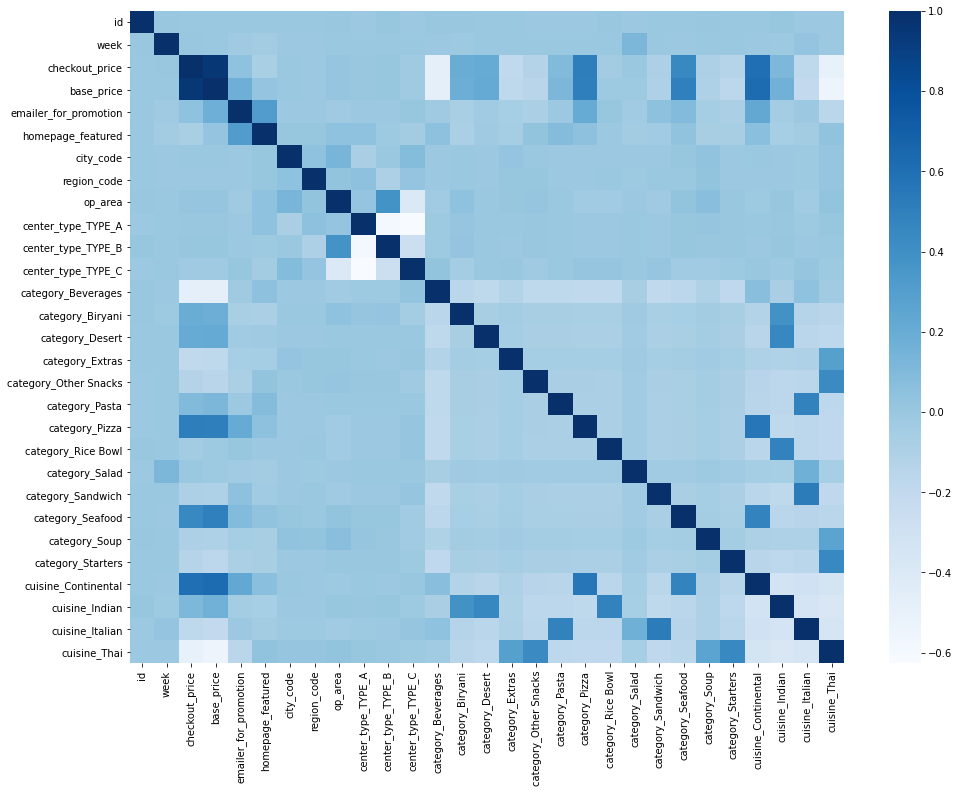

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 12))

sns.heatmap(X.corr(), cmap= 'Blues')

In [147]:
Pred_id=X_test.id
columns_to_drop=['id']



In [148]:
from sklearn.ensemble import RandomForestRegressor
mm=RandomForestRegressor(n_jobs=-1,n_estimators=200,oob_score=True)

In [149]:
#from xgboost import XGBRegressor
#from sklearn.model_selection import GridSearchCV

#xgb1 = XGBRegressor(n_estimators=30)
#xgb1.fit(X.values,np.array(y))

In [150]:
mm.fit(X.values,np.array(y))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [151]:
y_preds= mm.predict(X_test.values)
np.sum(y_preds<0)

0

In [154]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission_hSlSoT6.csv to sample_submission_hSlSoT6.csv


In [160]:
submission=pd.read_csv("sample_submission_hSlSoT6.csv")
submission.head()
submission['id']=Pred_id
submission['num_orders']=y_preds
pd.DataFrame(submission, columns=['id','num_orders']).to_csv('RandomForests.csv',index=False)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32573 non-null  int64  
 1   num_orders  32573 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 509.1 KB
